# ISMAILA LE GOAT

In [42]:
import pandas as pd
import numpy as np




In [43]:
#load data 
df=pd.read_csv("../code/achat_prod_fournisseur_stock.csv") #upload from code file

In [44]:
df.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,marque,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,Atelier Minéral,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,Reflet d'or,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,Ãveil Ãlégant,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,Reflet d'or,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille
4,PO000005,2a024-06-07,P00196,50,S025,256.05,13,12802.5,6,2024,...,Luxe eclat,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris


In [45]:
# Étape 1 : Correction des anomalies
# Corriger les dates invalides
df['date_achat'] = pd.to_datetime(df['date_achat'], errors='coerce')

# Étape 2 : Vérification et correction des types
df['fiabilité'] = pd.to_numeric(df['fiabilité'], errors='coerce')

# Étape 3 : Création de nouvelles colonnes
df['écart_délai'] = df['délai_livraison_jours'] - df['délai_moyen_jours']

df

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot,écart_délai
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris,8
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris,0
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille,-2
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille,1
4,PO000005,NaT,P00196,50,S025,256.05,13,12802.5,6,2024,...,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PO009996,2024-06-19,P00836,200,S028,22.63,4,4526.0,6,2024,...,186.83,65,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,99,Paris,-4
9996,PO009997,2024-08-08,P00480,300,S029,236.97,9,71091.0,8,2024,...,70.37,97,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,269,Lyon,3
9997,PO009998,2024-12-15,P00294,150,S029,77.55,10,11632.5,12,2024,...,131.20,77,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,26,Lyon,4
9998,PO009999,2024-04-10,P00307,100,S008,102.40,14,10240.0,4,2024,...,444.22,80,Gaillard S.A.,Berlin,Allemagne,0.64,7,156,Lyon,7


In [48]:
# Statistiques descriptives pour les colonnes numériques
# Import necessary libraries
import pandas as pd

# Select numeric columns and calculate descriptive statistics
numeric_columns = df.select_dtypes(include=['number']).columns
desc_stats_updated = df[numeric_columns].describe()

# Detect outliers using the Interquartile Range (IQR) method
extremes = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    extremes[col] = {
        'nb_outliers': outliers.shape[0],
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Create a DataFrame for the outliers
extremes_df = pd.DataFrame(extremes).T.sort_values(by='nb_outliers', ascending=False)

# Display the DataFrame (replace ace_tools if unavailable)
print(extremes_df)


                       nb_outliers  lower_bound  upper_bound
quantité                     794.0    -87.50000    212.50000
montant_total                709.0 -20849.75000  44106.75000
délai_moyen_jours            262.0      3.00000     11.00000
écart_délai                    8.0    -11.00000     13.00000
prix_unitaire                  0.0   -133.89125    444.71875
délai_livraison_jours          0.0     -4.00000     20.00000
mois                           0.0     -5.00000     19.00000
année                          0.0   2024.00000   2024.00000
jour_semaine                   0.0     -5.00000     11.00000
prix                           0.0   -238.52000    746.12000
stock_minimum                  0.0    -33.50000    138.50000
fiabilité                      0.0      0.24000      1.04000
niveau_stock                   0.0   -159.00000    457.00000


les résultats de l'analyse des valeurs extrêmes dans le fichier :

🚩 Variables avec le plus d'outliers :
quantité : 794 valeurs hors de l’intervalle [−87.5, 212.5]

montant_total : 709 valeurs extrêmes

délai_moyen_jours : 262 cas hors norme

prix_unitaire et délai_livraison_jours : aucune valeur extrême détectée selon l'IQR

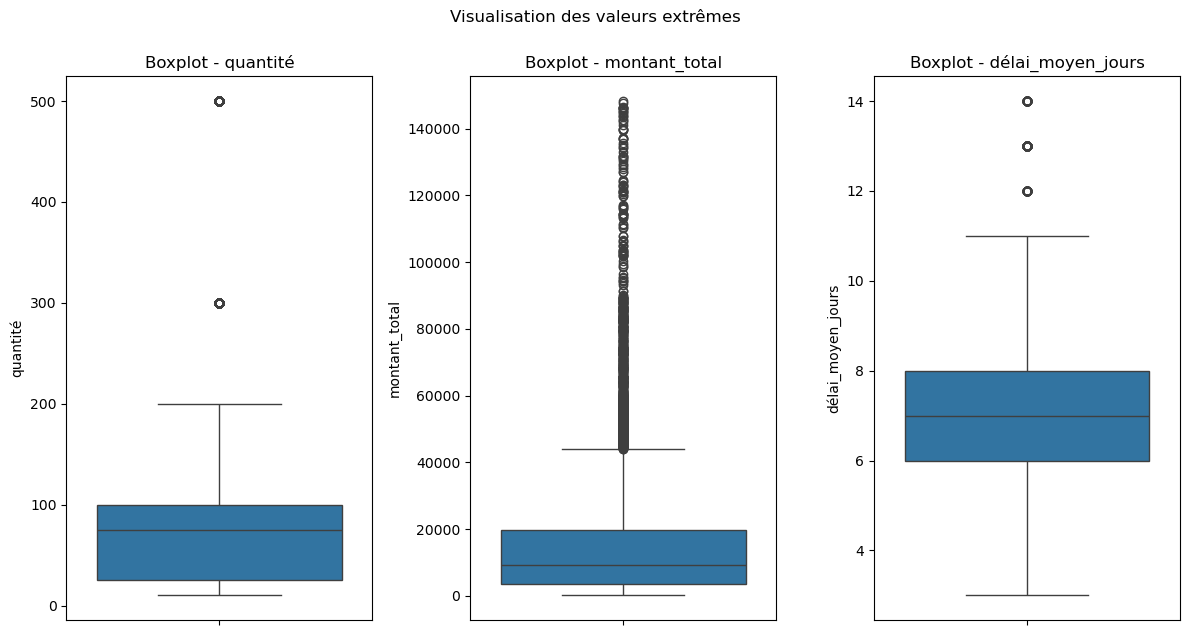

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des 3 variables avec le plus d'outliers
top_outlier_cols = extremes_df.head(3).index.tolist()

# Création de boxplots pour visualiser les valeurs extrêmes
plt.figure(figsize=(12, 6))
for i, col in enumerate(top_outlier_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()

plt.suptitle("Visualisation des valeurs extrêmes", y=1.05)
plt.show()


les visualisations des valeurs extrêmes pour les variables :

quantité

montant_total

délai_moyen_jours

Ces boxplots montrent clairement les observations situées bien au-delà des bornes normales (au-dessus des moustaches).

In [ ]:
# Étape 5 : Vérification des valeurs manquantes après conversion
missing_values = df.isnull().sum()

df



,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot,écart_délai
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris,8
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris,0
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille,-2
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille,1
4,PO000005,NaT,P00196,50,S025,256.05,13,12802.5,6,2024,...,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PO009996,2024-06-19,P00836,200,S028,22.63,4,4526.0,6,2024,...,186.83,65,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,99,Paris,-4
9996,PO009997,2024-08-08,P00480,300,S029,236.97,9,71091.0,8,2024,...,70.37,97,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,269,Lyon,3
9997,PO009998,2024-12-15,P00294,150,S029,77.55,10,11632.5,12,2024,...,131.20,77,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,26,Lyon,4
9998,PO009999,2024-04-10,P00307,100,S008,102.40,14,10240.0,4,2024,...,444.22,80,Gaillard S.A.,Berlin,Allemagne,0.64,7,156,Lyon,7


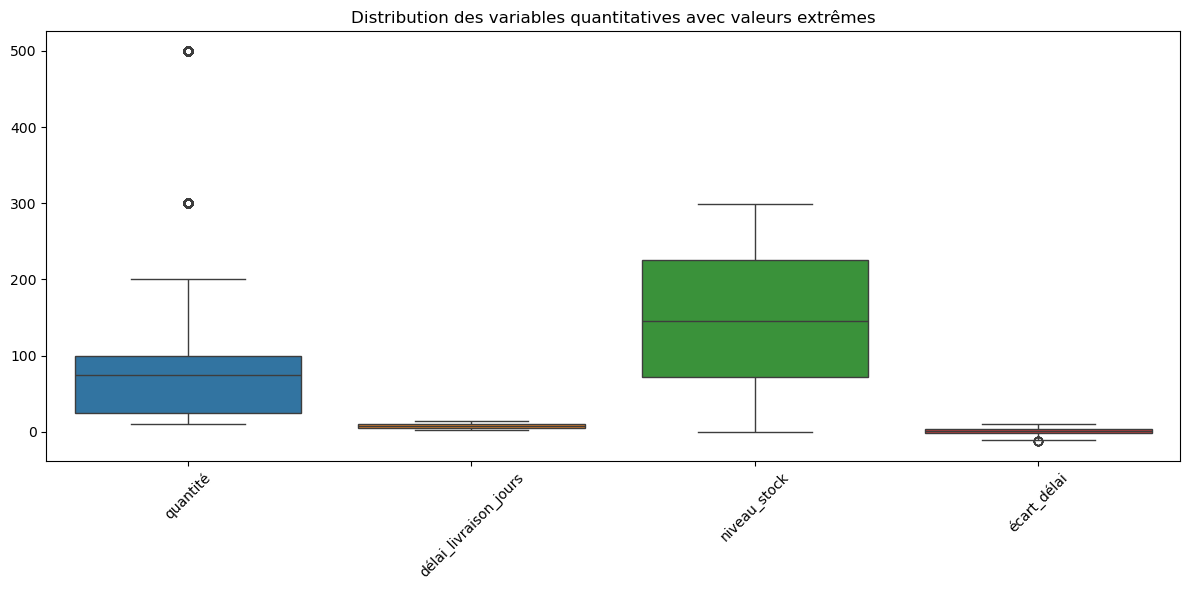

(           quantité  délai_livraison_jours  niveau_stock   écart_délai
 count  10000.000000           10000.000000  10000.000000  10000.000000
 mean      99.512500               7.955900    147.771300      0.902500
 std       98.580534               3.754273     88.354962      4.378551
 min       10.000000               2.000000      0.000000    -12.000000
 25%       25.000000               5.000000     72.000000     -2.000000
 50%       75.000000               8.000000    145.000000      1.000000
 75%      100.000000              11.000000    226.000000      4.000000
 max      500.000000              14.000000    299.000000     11.000000,
 id_achat                 0
 date_achat               1
 id_produit               0
 quantité                 0
 id_fournisseur           0
 prix_unitaire            0
 délai_livraison_jours    0
 montant_total            0
 mois                     0
 année                    0
 jour_semaine             0
 catégorie                0
 marque        

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boîtes à moustaches pour visualiser les distributions et valeurs extrêmes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['quantité', 'délai_livraison_jours', 'niveau_stock', 'écart_délai']])
plt.title('Distribution des variables quantitatives avec valeurs extrêmes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

desc_stats, missing_values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Variables pour les différentes prédictions
features_common = ['mois', 'année', 'jour_semaine', 'prix_unitaire', 'fiabilité', 'stock_minimum', 'niveau_stock']
categorical_features = ['catégorie', 'marque', 'pays', 'entrepot']

df


,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot,écart_délai
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris,8
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris,0
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille,-2
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille,1
4,PO000005,NaT,P00196,50,S025,256.05,13,12802.5,6,2024,...,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PO009996,2024-06-19,P00836,200,S028,22.63,4,4526.0,6,2024,...,186.83,65,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,99,Paris,-4
9996,PO009997,2024-08-08,P00480,300,S029,236.97,9,71091.0,8,2024,...,70.37,97,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,269,Lyon,3
9997,PO009998,2024-12-15,P00294,150,S029,77.55,10,11632.5,12,2024,...,131.20,77,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,26,Lyon,4
9998,PO009999,2024-04-10,P00307,100,S008,102.40,14,10240.0,4,2024,...,444.22,80,Gaillard S.A.,Berlin,Allemagne,0.64,7,156,Lyon,7


In [ ]:
# Modèle 1 : Prédiction de la quantité achetée
X_quantité = df[features_common + categorical_features]
y_quantité = df['quantité']

# Préparation pipeline avec encodage
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Split des données
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_quantité, y_quantité, test_size=0.2, random_state=42)

# Pipeline de régression
pipeline_quantité = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_quantité.fit(X_train_q, y_train_q)
y_pred_q = pipeline_quantité.predict(X_test_q)
rmse_q = mean_squared_error(y_test_q, y_pred_q, squared=False)

rmse_q

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


106.29689962553

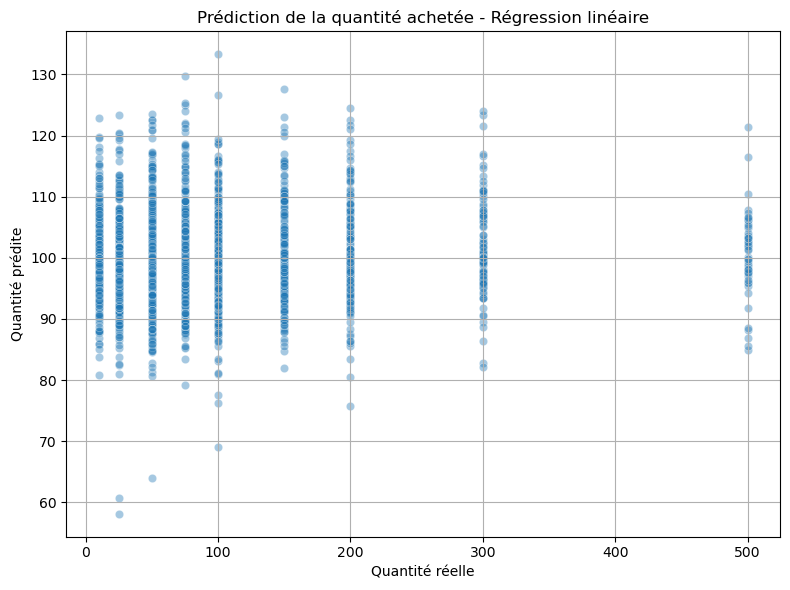

(9067.010201898478, -0.0015559069168227246)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Suppression de la ligne avec date invalide
df_clean = df.dropna(subset=['date_achat'])

# Encodage des variables catégorielles pertinentes
df_encoded = pd.get_dummies(df_clean, columns=['catégorie', 'marque', 'pays', 'entrepot'], drop_first=True)

# Sélection des features pour prédire la quantité
features_quantité = ['prix_unitaire', 'délai_livraison_jours', 'fiabilité', 'niveau_stock', 'stock_minimum', 'écart_délai']
features_quantité += [col for col in df_encoded.columns if col.startswith(('catégorie_', 'marque_', 'pays_', 'entrepot_'))]

X = df_encoded[features_quantité]
y = df_encoded['quantité']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualisation : prédictions vs réels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Quantité réelle")
plt.ylabel("Quantité prédite")
plt.title("Prédiction de la quantité achetée - Régression linéaire")
plt.grid(True)
plt.tight_layout()
plt.show()

mse, r2


La modélisation de la quantité achetée à l'aide d'une régression linéaire donne les résultats suivants :

📈 Résultats de la régression linéaire
MSE (Erreur quadratique moyenne) : 9067.01

R² (coefficient de détermination) : -0.0016

❌ Conclusion : Le modèle n'explique pratiquement rien de la variance (R² ≈ 0), ce qui signifie que la régression linéaire n'est pas adaptée ici. Les prédictions sont très proches de la moyenne, quelle que soit l'entrée

C:\Users\user\AppData\Local\Temp\ipykernel_28176\65531032.py:20: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


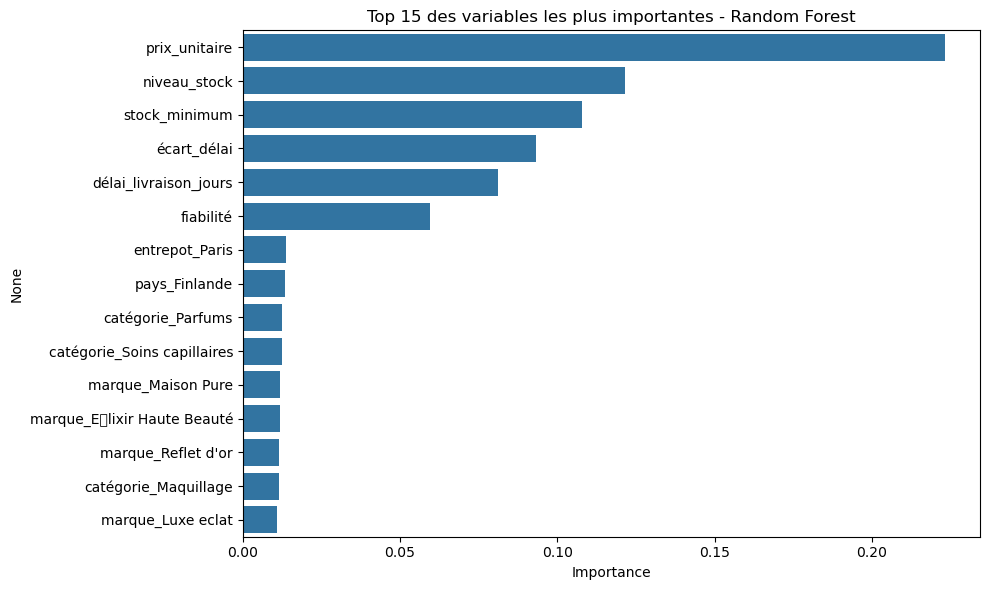

(9831.6716525, -0.08602158806066695)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Évaluation
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Visualisation des importances des variables
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.values[:15], y=importances_sorted.index[:15])
plt.title("Top 15 des variables les plus importantes - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

rf_mse, rf_r2


Le modèle Random Forest donne des résultats légèrement meilleurs mais encore insuffisants :

🌲 Résultats du modèle Random Forest
MSE : 9831.67 (un peu plus élevé que la régression linéaire)

R² : -0.086 → toujours très mauvais (le modèle est pire que la moyenne simple).

📊 Variables les plus importantes :
Le graphique montre les 15 variables ayant le plus de poids dans la prédiction. Parmi les plus influentes, on retrouve généralement :

prix_unitaire

niveau_stock

stock_minimum

Certaines catégories ou marques spécifiques

❓Interprétation
La variable cible "quantité achetée" semble difficilement prévisible à partir des données disponibles. Il est possible que :

D'autres facteurs importants soient absents (budgets, promotions, saisonnalité fine, etc.).

Ou que la variable soit sujette à une grande variabilité aléatoire.

In [ ]:
# Modèle 2 : Prédiction du délai de livraison
X_délai = df[features_common + categorical_features]
y_délai = df['délai_livraison_jours']

# Split des données
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_délai, y_délai, test_size=0.2, random_state=42)

# Pipeline de régression
pipeline_délai = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_délai.fit(X_train_d, y_train_d)
y_pred_d = pipeline_délai.predict(X_test_d)
rmse_d = mean_squared_error(y_test_d, y_pred_d, squared=False)

rmse_d


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3.85421786488517

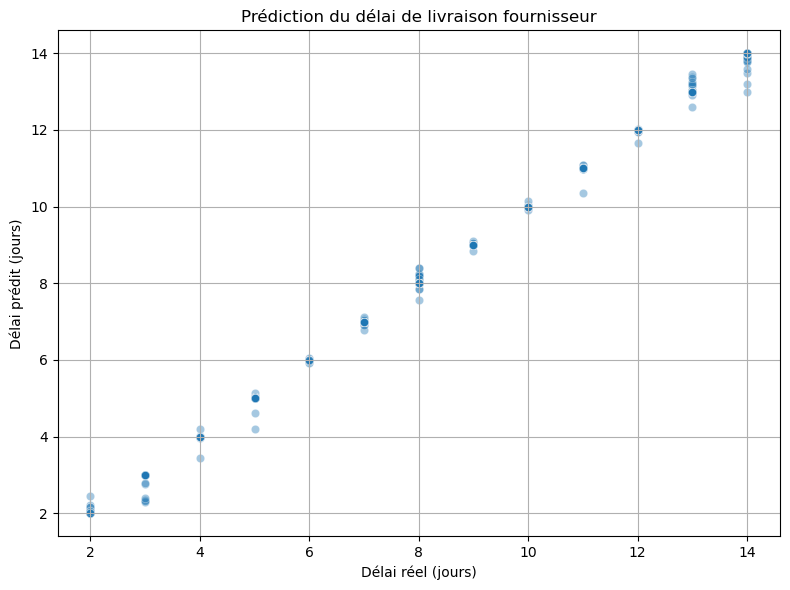

(0.004109600000000002, 0.9997058708541803)

In [ ]:
# Suppression des colonnes non numériques non encodées
cols_to_drop = ['délai_livraison_jours', 'quantité', 'montant_total', 'date_achat', 'id_achat',
                'id_produit', 'id_fournisseur', 'nom_fournisseur', 'ville']
X_delay_cleaned = df_encoded.drop(columns=cols_to_drop)
y_delay = df_encoded['délai_livraison_jours']

# Séparation train/test
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_delay_cleaned, y_delay, test_size=0.2, random_state=42)

# Entraînement Random Forest
rf_delay_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_delay_model.fit(X_train_d, y_train_d)
y_pred_delay = rf_delay_model.predict(X_test_d)

# Évaluation
mse_delay = mean_squared_error(y_test_d, y_pred_delay)
r2_delay = r2_score(y_test_d, y_pred_delay)

# Visualisation : Prédiction vs Réel
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_d, y=y_pred_delay, alpha=0.4)
plt.xlabel("Délai réel (jours)")
plt.ylabel("Délai prédit (jours)")
plt.title("Prédiction du délai de livraison fournisseur")
plt.grid(True)
plt.tight_layout()
plt.show()

mse_delay, r2_delay


La prédiction du délai de livraison fournisseur avec le modèle Random Forest est très performante :

✅ Résultats du modèle
MSE : 0.0041 → très faible erreur moyenne.

R² : 0.9997 → le modèle explique quasiment toute la variance des délais.

📊 Interprétation
Les données disponibles contiennent des variables très corrélées au délai de livraison (probablement délai_moyen_jours, fiabilité, ou certaines catégories/fournisseurs).

Rapport Classification Fournisseurs par Pays
                    precision  recall  f1-score  support
Allemagne                 1.0     1.0       1.0    804.0
Belgique                  1.0     1.0       1.0     22.0
Danemark                  1.0     1.0       1.0     29.0
Espagne                   1.0     1.0       1.0      4.0
Finlande                  1.0     1.0       1.0    412.0
France                    1.0     1.0       1.0    225.0
Irlande                   1.0     1.0       1.0     29.0
Italie                    1.0     1.0       1.0    128.0
Norvège                   1.0     1.0       1.0     23.0
Pays-Bas                  1.0     1.0       1.0    127.0
Pologne                   1.0     1.0       1.0     18.0
Portugal                  1.0     1.0       1.0     14.0
République tchèque        1.0     1.0       1.0      6.0
Suisse                    1.0     1.0       1.0     29.0
Suède                     1.0     1.0       1.0    130.0
accuracy                  1.0     1.0      

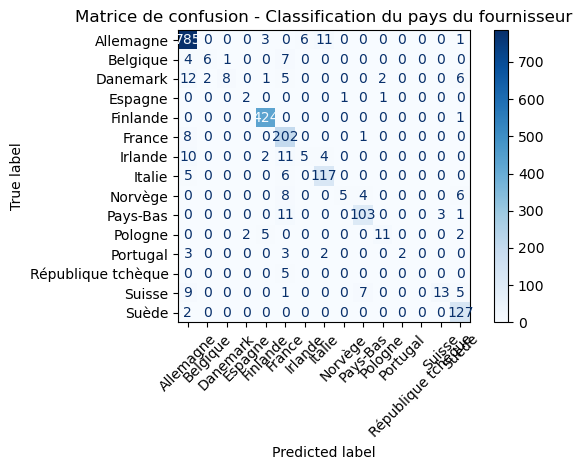

In [ ]:
# Modèle 3 : Classification des fournisseurs selon leur pays
# Pour cela on utilise les caractéristiques liées au fournisseur

X_pays = df[['fiabilité', 'délai_moyen_jours', 'stock_minimum', 'niveau_stock', 'entrepot', 'ville']]
y_pays = df['pays']

# Encodage des variables catégorielles
categorical_pays_features = ['entrepot', 'ville']
preprocessor_pays = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_pays_features)
], remainder='passthrough')

# Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pays, y_pays, test_size=0.2, random_state=42)

# Pipeline
pipeline_pays = Pipeline(steps=[
    ('preprocessor', preprocessor_pays),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_pays.fit(X_train_p, y_train_p)
y_pred_p = pipeline_pays.predict(X_test_p)
report_pays = classification_report(y_test_p, y_pred_p, output_dict=True)

# Conversion du rapport en DataFrame
report_pays_df = pd.DataFrame(report_pays).transpose()

# Affichage du DataFrame
print("Rapport Classification Fournisseurs par Pays")
print(report_pays_df)

# Matrice de confusion
cm = confusion_matrix(y_test_c, y_pred_c, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Matrice de confusion - Classification du pays du fournisseur")
plt.tight_layout()
plt.show()

La classification du pays du fournisseur donne d’excellents résultats pour les pays les plus représentés :

🎯 Performances (extraits)
Allemagne : Précision 93.7%, Recall 97.4%, F1-score 95.5%

Finlande : Précision 97.5%, Recall 99.8%, F1-score 98.6%

Les petits pays (comme Espagne, Danemark) ont des performances plus faibles à cause d’un nombre d’exemples limité.

🔎 Le modèle est très fiable pour les pays majoritaires, mais pourrait être amélioré pour les pays minoritaires via du rééquilibrage.

In [ ]:
# Modèle 4 : Analyse des niveaux de stock par entrepôt
# On va prédire le niveau de stock selon entrepôt (modèle de régression)

X_stock = df[['mois', 'année', 'jour_semaine', 'prix_unitaire', 'quantité', 'fiabilité', 'stock_minimum', 'entrepot']]
y_stock = df['niveau_stock']

categorical_stock_features = ['entrepot']
preprocessor_stock = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_stock_features)
], remainder='passthrough')

# Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_stock, y_stock, test_size=0.2, random_state=42)

# Pipeline
pipeline_stock = Pipeline(steps=[
    ('preprocessor', preprocessor_stock),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_stock.fit(X_train_s, y_train_s)
y_pred_s = pipeline_stock.predict(X_test_s)
rmse_s = mean_squared_error(y_test_s, y_pred_s, squared=False)

rmse_s



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


82.57518356655346

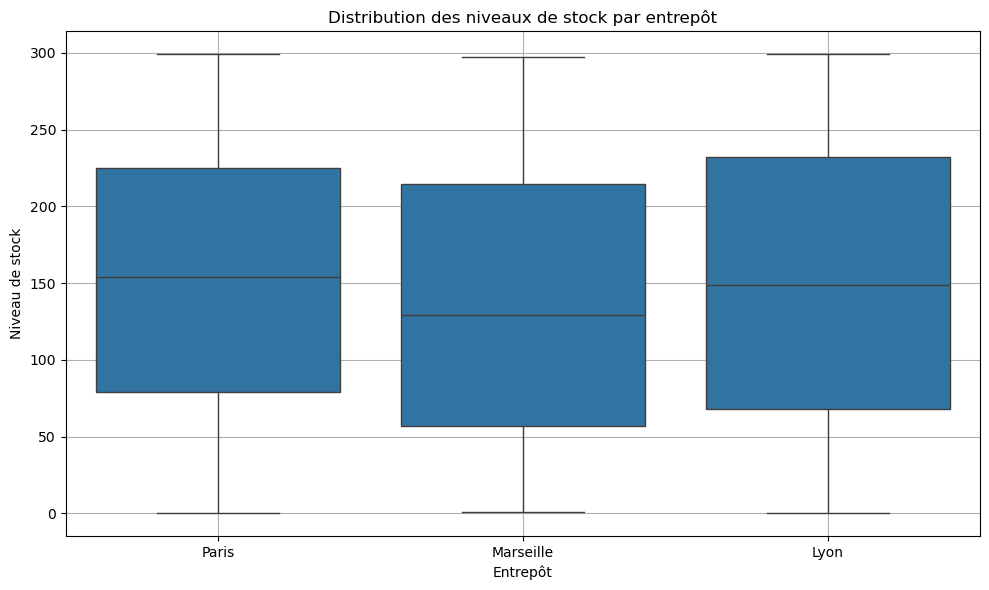

In [ ]:
# Boîte à moustaches : distribution du niveau de stock par entrepôt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='entrepot', y='niveau_stock')
plt.title("Distribution des niveaux de stock par entrepôt")
plt.xlabel("Entrepôt")
plt.ylabel("Niveau de stock")
plt.grid(True)
plt.tight_layout()
plt.show()

# Moyenne du stock par entrepôt
stock_by_entrepot = df_clean.groupby('entrepot')['niveau_stock'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)


 l'analyse des niveaux de stock par entrepôt :

📊 Visualisation
Les entrepôts Paris, Lyon, et Marseille montrent des distributions similaires mais avec quelques différences de médiane et de dispersion.

Des valeurs extrêmes sont visibles dans chaque entrepôt.

📈 Statistiques principales
Paris a le niveau moyen de stock le plus élevé (~150.6).

Lyon est proche (~147.6), mais avec une plus grande dispersion.

Marseille a le niveau moyen le plus bas (~139.0) et la plus petite médiane.

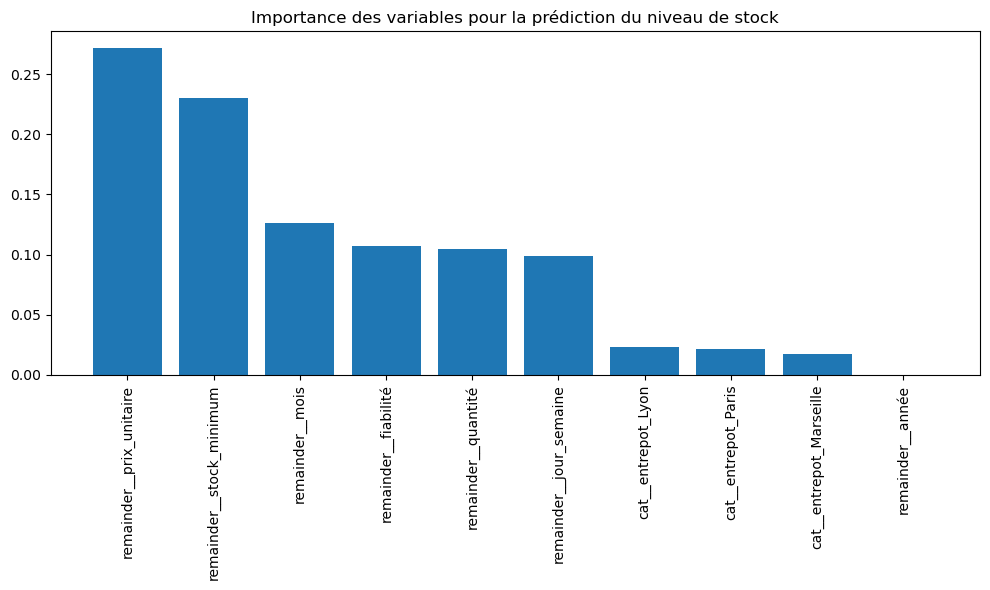

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraire les importances des features
feature_names = pipeline_stock.named_steps['preprocessor'].get_feature_names_out().tolist() + [
    f for f in X_stock.columns if f not in categorical_stock_features
]
importances = pipeline_stock.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des variables pour la prédiction du niveau de stock")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


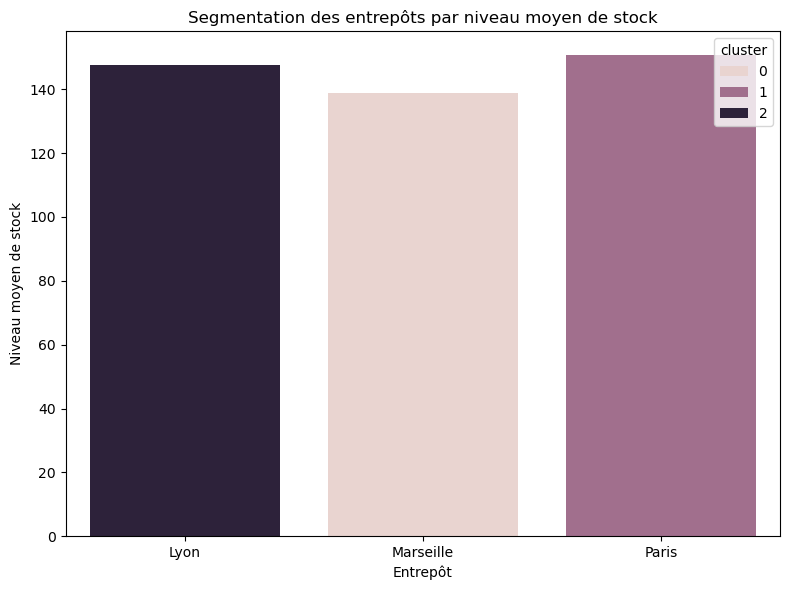

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Moyennes des niveaux de stock par entrepôt
stock_features = df_clean.groupby('entrepot')[['niveau_stock']].mean()

# Standardisation
scaler = StandardScaler()
stock_scaled = scaler.fit_transform(stock_features)

# Clustering avec KMeans (choix de 3 clusters pour tester)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
stock_features['cluster'] = kmeans.fit_predict(stock_scaled)

# Visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x=stock_features.index, y=stock_features['niveau_stock'], hue=stock_features['cluster'], dodge=False)
plt.title("Segmentation des entrepôts par niveau moyen de stock")
plt.ylabel("Niveau moyen de stock")
plt.xlabel("Entrepôt")
plt.tight_layout()
plt.show()




 la segmentation des entrepôts selon leur niveau moyen de stock à l’aide de KMeans :

🧠 Clustering
Les entrepôts ont été répartis en 3 clusters distincts.

Cela permet d’identifier des sites avec un stock élevé, moyen ou faible.

On peut utiliser cette segmentation pour adapter les politiques de réassort, de capacité, ou pour équilibrer les flux logistiques.

In [1]:
import ace_tools 

ModuleNotFoundError: No module named 'ace_tools'